# 从疝气病症预测病马的死亡率

导入模块

In [1]:
from numpy import *
import matplotlib.pyplot as plt

载入数据

In [2]:
def loadDatSet(filename):
    dataMat = [] # 用于存放数据
    labelMat = [] # 用于存放标签
    fr = open(filename) # 打开文件
    for line in fr.readlines(): # 读取行
        lineArr = line.strip().split() # 拆分
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])]) # 整理数据
        labelMat.append(int(lineArr[2])) # 加入标签
    return dataMat,labelMat # 返回数据和标签

sigmoid函数

In [3]:
def sigmoid(inX):
    return 1.0/(1.0+exp(-inX))

计算梯度

In [4]:
def calcGrad(weights,dataMatrix,labelMatrix):
    h = sigmoid(dataMatrix*weights) # 计算sigmoid输出
    grad = -dataMatrix.T*(labelMatrix - h) # 求梯度
    return grad # 返回梯度

梯度下降更新算法

In [5]:
def gradientDescent(dataMat,labelMat):
    dataMatrix = mat(dataMat) # 将数据转换成矩阵形式
    labelMatrix = mat(labelMat).T # 将标签转换成列矩阵
    n = shape(dataMatrix) # 得到数据矩阵的尺寸
    weights = ones((n[1],1)) # 初始化回归系数
    alpha = 0.001 # 设置学习率
    echo = 500 # 设置迭代次数
    for i in range(echo):
        weights = weights - alpha*calcGrad(weights,dataMatrix,labelMatrix) # 更新回归系数
    return weights # 返回回归系数

随机梯度下降

In [6]:
def stocGradDescent(dataMat,labelMat,numIter=150):
    dataMatrix = mat(dataMat) # 将数据转换成矩阵形式
    labelMatrix = mat(labelMat).T # 将标签转换成列矩阵
    n = shape(dataMat) # 得到数据矩阵的尺寸
    weights = ones((n[1],1)) # 初始化回归系数
    for j in range(numIter):
        dataIndex = list(range(n[0]))
        for i in range(n[0]):
            alpha = 4/(1.0 + j + i) + 0.01 # 设置学习率更新方式
            randIndex = int(random.choice(dataIndex)) # 随机选取数据索引
            weights = weights - alpha*calcGrad(weights,dataMatrix[randIndex],labelMatrix[randIndex]) # 更新回归系数
            dataIndex.remove(randIndex) # 删除当前索引
    return weights # 返回回归系数

画拟合直线

In [7]:
def plotBestFit(wei,dataMat,labelMat):
    weights = array(wei)
    dataArr = array(dataMat)
    n = shape(dataArr)[0] # 得到数据量
    x1cord1 = [];x2cord1 = [] # 存放1类横纵坐标
    x1cord2 = [];x2cord2 = [] # 存放0类横纵坐标
    # 存放坐标
    for i in range(n):
        if int(labelMat[i]) == 1:
            x1cord1.append(dataArr[i,1])
            x2cord1.append(dataArr[i,2])
        else:
            x1cord2.append(dataArr[i,1])
            x2cord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x1cord1,x2cord1,s=30,c='green',marker='s')
    ax.scatter(x1cord2,x2cord2,s=30,c='blue')
    x = arange(-3.0,3.0,0.1) # 直线横坐标
    y = (-weights[0]-weights[1]*x)/weights[2] # 直线纵坐标
    ax.plot(x,y,c='red')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

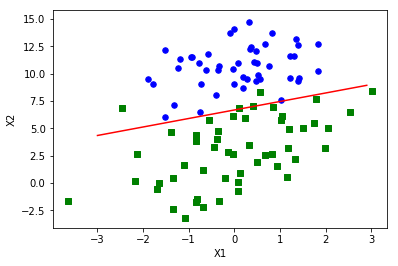

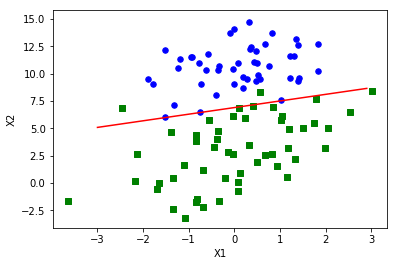

In [8]:
dataMat,labelMat = loadDatSet('C:/Users/exquisite/Downloads/machinelearninginaction-master/Ch05/testSet.txt')
weights_1 = gradientDescent(dataMat,labelMat)
weights_2 = stocGradDescent(dataMat,labelMat)
plotBestFit(weights_1,dataMat,labelMat)
plotBestFit(weights_2,dataMat,labelMat)

分类器

In [9]:
def classifyVector(inX,weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

测试函数

In [10]:
def colicTest():
    frTrain = open('C:/Users/exquisite/Downloads/machinelearninginaction-master/Ch05/horseColicTraining.txt') # 载入训练集
    frTest = open('C:/Users/exquisite/Downloads/machinelearninginaction-master/Ch05/horseColicTest.txt') # 载入测试集
    trainingSet = [] # 用于存放训练数据
    trainingLabels = [] # 用于存放训练标签
    # 整理数据
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradDescent(trainingSet,trainingLabels,500) # 得到回归系数
    errorCount = 0 # 错误数
    numTestVec = 0.0 # 存放测试数据个数
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(lineArr,trainWeights)) != int(currLine[21]): # 分类错误
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec) # 计算错误率
    print('the error rate of this test is: %f' % errorRate)
    return errorRate

多次测试函数

In [11]:
def multiTest():
    numTests = 10
    errorSum = 0.0
    # 计算十次取平均
    for k in range(numTests):
        errorSum += colicTest()
    print('after %d iterations the average error rate is: %f' % (numTests,errorSum/float(numTests)))

In [12]:
colicTest()

the error rate of this test is: 0.388060


0.3880597014925373

In [13]:
multiTest()

the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.283582
the error rate of this test is: 0.432836
the error rate of this test is: 0.253731
the error rate of this test is: 0.417910
the error rate of this test is: 0.253731
the error rate of this test is: 0.477612
the error rate of this test is: 0.552239
the error rate of this test is: 0.507463
after 10 iterations the average error rate is: 0.389552
